In [1]:
# Configure JAX
import jax
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_platform_name", "cpu")

In [2]:
import numpy as np

from twoqutritpulsesimulator import TwoQutritPulseSimulator
from processtomography import TwoQutritProcessTomography

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Process Tomography of a gate provided in the matrix form

In [4]:
sim = TwoQutritPulseSimulator()
backend = sim.get_backend()

In [5]:
gate = np.kron([[0,1,0],[1,0,0],[0,0,1]], [[1,0,0],[0,0,0],[0,0,0]]) + np.kron([[1,0,0],[0,1,0],[0,0,1]], [[0,0,0],[0,1,0],[0,0,0]]) + np.kron([[0,1,0],[1,0,0],[0,0,1]], [[0,0,0],[0,0,0],[0,0,1]])

qpt = TwoQutritProcessTomography(gate=gate, backend=backend)

### Obtaining the process matrix

In [6]:
process_matrix = qpt.run()

### Plotting the the process matrix

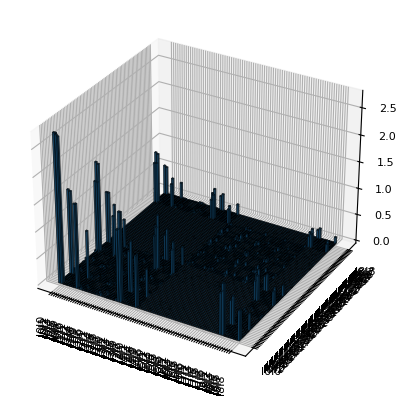

None

In [7]:
qpt.plot_chi()

## Process Tomography of a two-qutrit gate provided as a pulse

In [8]:
from qiskit import pulse
from simulator_parameters_2q import get_parameter
from qiskit.circuit import Parameter

freq_0 = get_parameter('freq', 0)
freq_1 = get_parameter('freq', 1)

ef_freq_0 = get_parameter('ef_freq', 0)
ef_freq_1 = get_parameter('ef_freq', 1)

In [9]:
dchan0 = pulse.DriveChannel(0)
dchan1 = pulse.DriveChannel(1)

uchan0 = pulse.ControlChannel(0)
uchan1 = pulse.ControlChannel(1)

In [10]:
def get_cr01_pulse(amp):
    dur = Parameter('duration')
    with pulse.build(name="cr_01") as cr01_pulse:        
        pulse.set_frequency(freq_1, uchan0)
        pulse.play(pulse.GaussianSquare(dur, amp, 76, 0.9*dur, limit_amplitude=False), uchan0)
    return cr01_pulse

def get_cr12_pulse(amp):
    dur = Parameter('duration')
    with pulse.build(name="cr_12") as cr12_pulse:        
        pulse.set_frequency(ef_freq_1, uchan0)
        pulse.play(pulse.GaussianSquare(dur, amp, 76, 0.9*dur, limit_amplitude=False), uchan0)
    return cr12_pulse

In [11]:
amplitude = 1.1
duration = 900

cr_pulse = get_cr01_pulse(amplitude)
cr_pulse.assign_parameters({'duration': int(duration)})

ScheduleBlock(SetFrequency(5500000000.0, ControlChannel(0)), Play(GaussianSquare(duration=900, sigma=76, width=810, amp=1.1, angle=0.0), ControlChannel(0)), name="cr_01", transform=AlignLeft())

In [12]:
qpt_pulse = TwoQutritProcessTomography(gate_pulse=cr_pulse, backend=backend)

### Obtaining the process matrix corresponding to the pulse

In [13]:
process_matrix_pulse = qpt_pulse.run()

### Plotting the the process matrix corresponding to the pulse

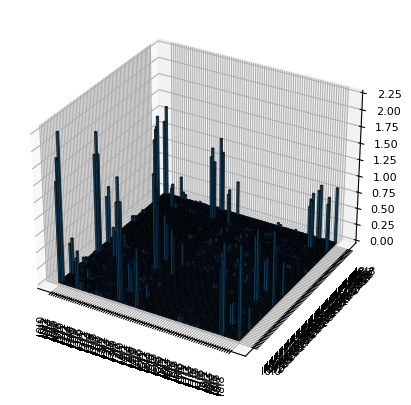

None

In [14]:
 qpt_pulse.plot_chi()